In [1]:
from datetime import datetime

# Packages for EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Packages options 
sns.set(rc={'figure.figsize': [14, 7]}, font_scale=1.2) # Standard figure size for all 
pd.set_option('display.max_columns', None) # Display all columns

import warnings 
warnings.filterwarnings("ignore")

## EDA
#### Read data

- parse Joined column as a date

In [2]:
# Read data into memory. View columns, data types and null values.
df = pd.read_csv("fifa21_raw_data_v2.csv", parse_dates=['Joined'], low_memory=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18979 entries, 0 to 18978
Data columns (total 77 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ID                18979 non-null  int64         
 1   Name              18979 non-null  object        
 2   LongName          18979 non-null  object        
 3   photoUrl          18979 non-null  object        
 4   playerUrl         18979 non-null  object        
 5   Nationality       18979 non-null  object        
 6   Age               18979 non-null  int64         
 7   ↓OVA              18979 non-null  int64         
 8   POT               18979 non-null  int64         
 9   Club              18979 non-null  object        
 10  Contract          18979 non-null  object        
 11  Positions         18979 non-null  object        
 12  Height            18979 non-null  object        
 13  Weight            18979 non-null  object        
 14  Preferred Foot    1897

In [3]:
# View 5 rows of the dataset.
df.head()

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,Contract,Positions,Height,Weight,Preferred Foot,BOV,Best Position,Joined,Loan Date End,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93,93,\n\n\n\nFC Barcelona,2004 ~ 2021,"RW, ST, CF",170cm,72kg,Left,93,RW,2004-07-01,NaN,€103.5M,€560K,€138.4M,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,4 ★,4★,Medium,Low,5 ★,85,92,91,95,38,65,771
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92,92,\n\n\n\nJuventus,2018 ~ 2022,"ST, LW",187cm,83kg,Right,92,ST,2018-07-10,NaN,€63M,€220K,€75.9M,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2221,464,4 ★,5★,High,Low,5 ★,89,93,81,89,35,77,562
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91,93,\n\n\n\nAtlético Madrid,2014 ~ 2023,GK,188cm,87kg,Right,91,GK,2014-07-16,NaN,€120M,€125K,€159.4M,95,13,11,15,43,13,109,12,13,14,40,30,307,43,60,67,88,49,268,59,78,41,78,12,140,34,19,11,65,11,68,57,27,12,18,437,87,92,78,90,90,1413,489,3 ★,1★,Medium,Medium,3 ★,87,92,78,90,52,90,150
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91,91,\n\n\n\nManchester City,2015 ~ 2023,"CAM, CM",181cm,70kg,Right,91,CAM,2015-08-30,NaN,€129M,€370K,€161M,407,94,82,55,94,82,441,88,85,83,93,92,398,77,76,78,91,76,408,91,63,89,74,91,408,76,66,88,94,84,91,186,68,65,53,56,15,13,5,10,13,2304,485,5 ★,4★,High,High,4 ★,76,86,93,88,64,78,207
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91,91,\n\n\n\nParis Saint-Germain,2017 ~ 2022,"LW, CAM",175cm,68kg,Right,91,LW,2017-08-03,NaN,€132M,€270K,€166.5M,408,85,87,62,87,87,448,95,88,89,81,95,453,94,89,96,91,83,357,80,62,81,50,84,356,51,36,87,90,92,93,94,35,30,29,59,9,9,15,15,11,2175,451,5 ★,5★,High,Medium,5 ★,91,85,86,94,36,59,595


In [4]:
# Statistical description of all numerical columns.
df.describe() 

,ID,Age,↓OVA,POT,BOV,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,PAC,SHO,PAS,DRI,DEF,PHY
count,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.00000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000
mean,226403.384794,25.194109,65.718636,71.136414,66.751726,248.938142,49.688392,45.842405,51.942726,58.768112,42.696507,256.479214,55.587491,47.246957,42.391011,52.725381,58.528373,317.718689,64.357553,64.412930,63.366721,61.655619,63.925865,296.605195,57.801676,64.577375,62.653986,64.786922,46.785236,254.199747,55.591285,46.394489,50.298962,53.857105,48.057906,58.07366,139.909268,46.559197,47.705622,45.644449,81.436693,16.416302,16.207124,16.076453,16.217187,16.519627,1595.286949,355.702197,67.453975,53.457031,57.681016,62.875020,49.866221,64.368934
std,27141.054157,4.710520,6.968999,6.114635,6.747193,74.299428,18.131153,19.567081,17.294409,14.519106,17.646937,78.650601,18.761314,18.207790,17.227947,15.178151,16.565892,55.879046,14.889981,14.638743,14.596277,9.072114,14.062285,50.732390,13.308747,11.844870,15.804223,12.488672,19.300534,64.595613,17.140414,20.698078,19.428701,13.708574,15.655999,12.07911,61.219472,20.139324,21.367690,20.922087,84.665579,17.554194,16.816305,16.491103,17.002239,17.854079,269.874789,40.761117,10.677859,13.827425,10.081857,9.927415,16.443213,9.601883
min,41.000000,16.000000,47.000000,47.000000,48.000000,42.000000,6.000000,3.000000,5.000000,7.000000,3.000000,40.000000,5.000000,4.000000,5.000000,5.000000,5.000000,122.000000,13.000000,12.000000,14.000000,24.000000,12.000000,122.000000,18.000000,15.000000,12.000000,16.000000,4.000000,50.000000,9.000000,3.000000,2.000000,9.000000,6.000000,12.00000,20.000000,3.000000,5.000000,4.000000,10.000000,2.000000,2.000000,2.000000,2.000000,2.000000,747.000000,232.000000,25.000000,16.000000,25.000000,25.000000,12.000000,28.000000
25%,210135.000000,21.000000,61.000000,67.000000,62.000000,222.000000,38.000000,30.000000,44.000000,54.000000,30.000000,222.000000,49.000000,35.000000,31.000000,43.000000,54.000000,289.000000,57.000000,57.000000,55.000000,56.000000,56.000000,264.000000,48.000000,58.000000,55.000000,57.000000,32.000000,227.500000,44.000000,25.000000,40.000000,45.000000,39.000000,50.00000,83.000000,29.000000,27.000000,25.000000,48.000000,8.000000,8.000000,8.000000,8.000000,8.000000,1452.000000,327.000000,61.000000,44.000000,51.000000,57.000000,35.000000,58.000000
50%,232418.000000,25.000000,66.000000,71.000000,67.000000,263.000000,54.000000,49.000000,55.000000,62.000000,44.000000,269.000000,61.000000,49.000000,41.000000,56.000000,63.000000,327.000000,67.000000,67.000000,66.000000,62.000000,66.000000,302.000000,59.000000,65.000000,66.000000,66.000000,51.000000,263.000000,58.000000,53.000000,55.000000,55.000000,49.000000,59.00000,159.000000,52.000000,55.000000,52.000000,53.000000,11.000000,11.000000,11.000000,11.000000,11.000000,1627.000000,356.000000,68.000000,56.000000,58.000000,64.000000,53.000000,65.000000
75%,246922.500000,29.000000,70.000000,75.000000,71.000000,297.

In [5]:
# check for duplicate rows.
df.duplicated().sum()

0

#### Wage Column
- remove 'K' and '€';
- replace 'K' with '000';
- change datatype to integer;
- indicate currency on column name.

In [6]:
zero_ind = []
zero_vals = []
k_ind = []
k_vals = []

# Remove € and K signs. 
for i in range(len(df['Wage'])):
    value = df.loc[i, 'Wage']
    if isinstance(value, str) and len(value) > 1:
        if value[-1] == '0': # If last character is 0. 
            zero_ind.append(i) # Then append index into respective list.
            zero_vals.append(df.loc[i, 'Wage'][1:]) # Append value into respective list.
            df.loc[i, 'Wage'] = float(zero_vals[zero_ind.index(i)])
        else: # If last character is K.
            k_ind.append(i) # Then append index into respective list.
            k_vals.append(df.loc[i, 'Wage'][1:-1]) # Append value into respective list.
            df.loc[i, 'Wage'] = float(k_vals[k_ind.index(i)]) * 1_000 # Convert dtype to float and multiply by 1000.
            
# Rename column.
df.rename(columns={'Wage': 'Wage (€)'}).head()

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,Contract,Positions,Height,Weight,Preferred Foot,BOV,Best Position,Joined,Loan Date End,Value,Wage (€),Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93,93,\n\n\n\nFC Barcelona,2004 ~ 2021,"RW, ST, CF",170cm,72kg,Left,93,RW,2004-07-01,NaN,€103.5M,560000.0,€138.4M,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,4 ★,4★,Medium,Low,5 ★,85,92,91,95,38,65,771
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92,92,\n\n\n\nJuventus,2018 ~ 2022,"ST, LW",187cm,83kg,Right,92,ST,2018-07-10,NaN,€63M,220000.0,€75.9M,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2221,464,4 ★,5★,High,Low,5 ★,89,93,81,89,35,77,562
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91,93,\n\n\n\nAtlético Madrid,2014 ~ 2023,GK,188cm,87kg,Right,91,GK,2014-07-16,NaN,€120M,125000.0,€159.4M,95,13,11,15,43,13,109,12,13,14,40,30,307,43,60,67,88,49,268,59,78,41,78,12,140,34,19,11,65,11,68,57,27,12,18,437,87,92,78,90,90,1413,489,3 ★,1★,Medium,Medium,3 ★,87,92,78,90,52,90,150
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91,91,\n\n\n\nManchester City,2015 ~ 2023,"CAM, CM",181cm,70kg,Right,91,CAM,2015-08-30,NaN,€129M,370000.0,€161M,407,94,82,55,94,82,441,88,85,83,93,92,398,77,76,78,91,76,408,91,63,89,74,91,408,76,66,88,94,84,91,186,68,65,53,56,15,13,5,10,13,2304,485,5 ★,4★,High,High,4 ★,76,86,93,88,64,78,207
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91,91,\n\n\n\nParis Saint-Germain,2017 ~ 2022,"LW, CAM",175cm,68kg,Right,91,LW,2017-08-03,NaN,€132M,270000.0,€166.5M,408,85,87,62,87,87,448,95,88,89,81,95,453,94,89,96,91,83,357,80,62,81,50,84,356,51,36,87,90,92,93,94,35,30,29,59,9,9,15,15,11,2175,451,5 ★,5★,High,Medium,5 ★,91,85,86,94,36,59,595


#### Height Column
- remove 'cm', and ' " ' from height;
- filter inches from cm;
- convert inches to cm;
- change data type to integer;
- rename column to "Height (cm)".

In [7]:
# Remove cm and ".
df['Height'] = df['Height'].str.replace('cm', '')
df['Height'] = df['Height'].str.replace('"', '')

inches_list = []
indexes = []

# Append empty lists with indices and height in inches.
for i in range(len(df['Height'])):
    if "'" in df.loc[i, 'Height']:
        indexes.append(i)
        inches_list.append(df.loc[i, 'Height'])

inches_list[0]

"6'2"

In [8]:
# Function to convert inches to cm.
def heightToCm(height):
    feet, inches = height.split("'")
    feet = int(feet)
    inches = int(inches)
    height_in_cm = (feet * 30.48) + (inches * 2.54)
    return height_in_cm

In [9]:
# Put converted cm into height column according to indices.
for i in indexes:
    newHeight = heightToCm(df.loc[i, 'Height'])
    df.loc[i, 'Height'] = newHeight

In [10]:
# Change dtype and column name.
df['Height'] = df['Height'].astype(int)
df.rename(columns={'Height': 'Height (cm)'}).head()

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,Contract,Positions,Height (cm),Weight,Preferred Foot,BOV,Best Position,Joined,Loan Date End,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93,93,\n\n\n\nFC Barcelona,2004 ~ 2021,"RW, ST, CF",170,72kg,Left,93,RW,2004-07-01,NaN,€103.5M,560000.0,€138.4M,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,4 ★,4★,Medium,Low,5 ★,85,92,91,95,38,65,771
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92,92,\n\n\n\nJuventus,2018 ~ 2022,"ST, LW",187,83kg,Right,92,ST,2018-07-10,NaN,€63M,220000.0,€75.9M,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2221,464,4 ★,5★,High,Low,5 ★,89,93,81,89,35,77,562
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91,93,\n\n\n\nAtlético Madrid,2014 ~ 2023,GK,188,87kg,Right,91,GK,2014-07-16,NaN,€120M,125000.0,€159.4M,95,13,11,15,43,13,109,12,13,14,40,30,307,43,60,67,88,49,268,59,78,41,78,12,140,34,19,11,65,11,68,57,27,12,18,437,87,92,78,90,90,1413,489,3 ★,1★,Medium,Medium,3 ★,87,92,78,90,52,90,150
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91,91,\n\n\n\nManchester City,2015 ~ 2023,"CAM, CM",181,70kg,Right,91,CAM,2015-08-30,NaN,€129M,370000.0,€161M,407,94,82,55,94,82,441,88,85,83,93,92,398,77,76,78,91,76,408,91,63,89,74,91,408,76,66,88,94,84,91,186,68,65,53,56,15,13,5,10,13,2304,485,5 ★,4★,High,High,4 ★,76,86,93,88,64,78,207
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91,91,\n\n\n\nParis Saint-Germain,2017 ~ 2022,"LW, CAM",175,68kg,Right,91,LW,2017-08-03,NaN,€132M,270000.0,€166.5M,408,85,87,62,87,87,448,95,88,89,81,95,453,94,89,96,91,83,357,80,62,81,50,84,356,51,36,87,90,92,93,94,35,30,29,59,9,9,15,15,11,2175,451,5 ★,5★,High,Medium,5 ★,91,85,86,94,36,59,595


#### Weight Column
- remove 'kg' and 'lbs';
- convert pounds to kgs;
- convert column to int;
- rename column to 'Weight (kg).

In [11]:
# Remove kg from column.
df['Weight'] = df['Weight'].str.replace('kg', '')

lbs_list = []
lbs_indexes = []

# Put indices and respective pounds in empty lists above.
for i in range(len(df['Weight'])):
    if "lbs" in df.loc[i, 'Weight']:
        lbs_indexes.append(i)
        lbs_list.append(df.loc[i, 'Weight'])

lbs_list[:3]

['183lbs', '179lbs', '183lbs']

In [12]:
# Convert pounds to KGs
def poundsToKg(weight):
    lbs = weight.replace('lbs', '')
    lbs = int(lbs)
    lbs_in_kg = lbs * 0.45
    return lbs_in_kg

In [13]:
# Put converted values in column according to indices.
for i in lbs_indexes:
    newWeight = poundsToKg(df.loc[i, 'Weight'])
    df.loc[i, 'Weight'] = newWeight

In [14]:
# Change dtype and name of column.
df['Weight'] = df['Weight'].astype(int)
df.rename(columns={'Weight': 'Weight (kg)'}).head()

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,Contract,Positions,Height,Weight (kg),Preferred Foot,BOV,Best Position,Joined,Loan Date End,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93,93,\n\n\n\nFC Barcelona,2004 ~ 2021,"RW, ST, CF",170,72,Left,93,RW,2004-07-01,NaN,€103.5M,560000.0,€138.4M,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,4 ★,4★,Medium,Low,5 ★,85,92,91,95,38,65,771
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92,92,\n\n\n\nJuventus,2018 ~ 2022,"ST, LW",187,83,Right,92,ST,2018-07-10,NaN,€63M,220000.0,€75.9M,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2221,464,4 ★,5★,High,Low,5 ★,89,93,81,89,35,77,562
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91,93,\n\n\n\nAtlético Madrid,2014 ~ 2023,GK,188,87,Right,91,GK,2014-07-16,NaN,€120M,125000.0,€159.4M,95,13,11,15,43,13,109,12,13,14,40,30,307,43,60,67,88,49,268,59,78,41,78,12,140,34,19,11,65,11,68,57,27,12,18,437,87,92,78,90,90,1413,489,3 ★,1★,Medium,Medium,3 ★,87,92,78,90,52,90,150
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91,91,\n\n\n\nManchester City,2015 ~ 2023,"CAM, CM",181,70,Right,91,CAM,2015-08-30,NaN,€129M,370000.0,€161M,407,94,82,55,94,82,441,88,85,83,93,92,398,77,76,78,91,76,408,91,63,89,74,91,408,76,66,88,94,84,91,186,68,65,53,56,15,13,5,10,13,2304,485,5 ★,4★,High,High,4 ★,76,86,93,88,64,78,207
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91,91,\n\n\n\nParis Saint-Germain,2017 ~ 2022,"LW, CAM",175,68,Right,91,LW,2017-08-03,NaN,€132M,270000.0,€166.5M,408,85,87,62,87,87,448,95,88,89,81,95,453,94,89,96,91,83,357,80,62,81,50,84,356,51,36,87,90,92,93,94,35,30,29,59,9,9,15,15,11,2175,451,5 ★,5★,High,Medium,5 ★,91,85,86,94,36,59,595


#### Club Column
- remove extra spaces in the column.

In [15]:
# Remove extra space in column.
df['Club'] = df['Club'].str.replace('\n', '')
df['Club'].head()

0           FC Barcelona
1               Juventus
2        Atlético Madrid
3        Manchester City
4    Paris Saint-Germain
Name: Club, dtype: object

#### Value Column
- remove '€', 'K' and 'M';
- change datatype to integer;
- add appropriate zeros to the figures;
- specify currency in column name.

In [16]:
# View the first row value excluding thefirst and last characters.
df.loc[0, 'Value']

'€103.5M'

In [17]:
# Function to clean columns.
def process_column(df, col):
    """
    Process the specified column in the DataFrame by modifying its values based on certain conditions.
    Conditions: Remove the '€', 'K' and 'M' characters from the values.
                Values that have 0 to retain the value.
                Values with 'K' to be multiplied by 1_000.
                Values with 'M' to be multiplied by 1_000_000. 

    Args:
        df (pandas.DataFrame): The DataFrame containing the column to be processed.
        column_name (str): The name of the column to be processed.

    Returns:
        pandas.DataFrame: The modified DataFrame with the specified column processed.

    """
    # Empty lists.
    k_values_ind = []
    m_values_ind = []
    k_values = []
    m_values = []

    # Remove €, K and M signs. 
    for i in range(len(df[col])):
        value = df.loc[i, col]
        if isinstance(value, str) and len(value) > 1:
            if value[1] == '0': # If 2nd character is 0. 
                df.loc[i, col] = 0 # Then the whole cell is 0.
            elif value[-1] == 'K': # If 2nd character is K.
                k_values_ind.append(i) # Then append index into respective list.
                k_values.append(df.loc[i, col][1: -1]) # Append value into respective list.
                df.loc[i, col] = float(k_values[k_values_ind.index(i)]) * 1_000 # Convert dtype to float and multiply by 1000. 
            else: # 2nd character is M.
                m_values_ind.append(i) # Append index to respective list.
                m_values.append(df.loc[i, col][1: -1]) # Append value into respective list.
                df.loc[i, col] = float(m_values[m_values_ind.index(i)]) * 1_000_000 # Convert dtype to float and multiply by 1_000_000

    # Rename column.
    df.rename(columns={col: f'{col} (€)'}, inplace=True)

    return df

In [18]:
# Use defined funtion.
df = process_column(df, 'Value')

In [19]:
# View processed column.
df['Value (€)']

0        103500000.0
1         63000000.0
2        120000000.0
3        129000000.0
4        132000000.0
            ...     
18974       100000.0
18975       130000.0
18976       120000.0
18977       100000.0
18978       100000.0
Name: Value (€), Length: 18979, dtype: object

#### Stars in Columns
- remove stars in the columns
- change to numerical datatype

In [20]:
# Put columns with in list.
stars = ['W/F', 'SM', 'IR']

# View 1st row in specified column.
df.loc[0, 'W/F']

'4 ★'

In [21]:
# Remove last character and change dtype.
for column in stars:
    for i in range(len(df)):
        df.loc[i, column] = df.loc[i, column][0]
    df[column] = df[column].astype(int)

#### Hits Column
- replace 'K' with 000
- change to numerical datatype

In [22]:
# Remove K and multiply by 1_000.
for i in range(len(df)):
    if isinstance(df.loc[i, 'Hits'], str) and df.loc[i, 'Hits'][-1] == 'K':
        df.loc[i, 'Hits'] = float(df.loc[i, 'Hits'][:-1]) * 1_000

In [23]:
# Put 0 on all null values.
df['Hits'] = df['Hits'].fillna(0)

In [24]:
# Change dtype to int.
df['Hits'] = df['Hits'].astype(int)

#### Release Clause Column
- remove characters
- change to numerical datatype
- change column name

In [25]:
# View 1st row
df.loc[0, 'Release Clause']

'€138.4M'

In [26]:
# Use defined function to clean the column.
df = process_column(df, 'Release Clause')

#### Age Column
- change datatype to integer

In [27]:
# View statistical description of column.
df['Age'].describe()

count    18979.000000
mean        25.194109
std          4.710520
min         16.000000
25%         21.000000
50%         25.000000
75%         29.000000
max         53.000000
Name: Age, dtype: float64

In [28]:
# Change dtype of column to int.
df['Age'] = df['Age'].apply(np.int32)
df['Age'].head()

0    33
1    35
2    27
3    29
4    28
Name: Age, dtype: int32

#### PhotoUrl Column
- fix broken url by replacing 'com' with 'net'

In [29]:
# View column.
df['photoUrl'].head()

0    https://cdn.sofifa.com/players/158/023/21_60.png
1    https://cdn.sofifa.com/players/020/801/21_60.png
2    https://cdn.sofifa.com/players/200/389/21_60.png
3    https://cdn.sofifa.com/players/192/985/21_60.png
4    https://cdn.sofifa.com/players/190/871/21_60.png
Name: photoUrl, dtype: object

In [30]:
# Replace text in url.
df['photoUrl'] = df['photoUrl'].str.replace('com', 'net')

#### Loan Date End Column

- drop column because it has to many null values.

In [31]:
# View number of null values.
print('Number of null values in column: ', df['Loan Date End'].isnull().sum())
print('Number of not null values: ', df['Loan Date End'].value_counts().sum())

Number of null values in column:  17966
Number of not null values:  1013


In [32]:
# Drop the column.
df.drop(['Loan Date End'], axis=1, inplace=True)
df.head()

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,Contract,Positions,Height,Weight,Preferred Foot,BOV,Best Position,Joined,Value (€),Wage,Release Clause (€),Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.net/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93,93,FC Barcelona,2004 ~ 2021,"RW, ST, CF",170,72,Left,93,RW,2004-07-01,103500000.0,560000.0,138400000.0,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,4,4,Medium,Low,5,85,92,91,95,38,65,771
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.net/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92,92,Juventus,2018 ~ 2022,"ST, LW",187,83,Right,92,ST,2018-07-10,63000000.0,220000.0,75900000.0,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2221,464,4,5,High,Low,5,89,93,81,89,35,77,562
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.net/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91,93,Atlético Madrid,2014 ~ 2023,GK,188,87,Right,91,GK,2014-07-16,120000000.0,125000.0,159400000.0,95,13,11,15,43,13,109,12,13,14,40,30,307,43,60,67,88,49,268,59,78,41,78,12,140,34,19,11,65,11,68,57,27,12,18,437,87,92,78,90,90,1413,489,3,1,Medium,Medium,3,87,92,78,90,52,90,150
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.net/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91,91,Manchester City,2015 ~ 2023,"CAM, CM",181,70,Right,91,CAM,2015-08-30,129000000.0,370000.0,161000000.0,407,94,82,55,94,82,441,88,85,83,93,92,398,77,76,78,91,76,408,91,63,89,74,91,408,76,66,88,94,84,91,186,68,65,53,56,15,13,5,10,13,2304,485,5,4,High,High,4,76,86,93,88,64,78,207
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.net/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91,91,Paris Saint-Germain,2017 ~ 2022,"LW, CAM",175,68,Right,91,LW,2017-08-03,132000000.0,270000.0,166500000.0,408,85,87,62,87,87,448,95,88,89,81,95,453,94,89,96,91,83,357,80,62,81,50,84,356,51,36,87,90,92,93,94,35,30,29,59,9,9,15,15,11,2175,451,5,5,High,Medium,5,91,85,86,94,36,59,595


#### Contract column

- remove extra text
- split column into two (start and end)
- change the dtype to int
- calculate years served in a new column
- drop contract column after splitting

In [33]:
# Empty lists.
on_loan_list = []
indexes = []

# Put target values in respective lists.
for i in range(len(df['Contract'])):
    if "Loan" in df.loc[i, 'Contract']:
        indexes.append(i)
        on_loan_list.append(df.loc[i, 'Contract'])

on_loan_list[0]

'Jun 30, 2021 On Loan'

In [34]:
# Perform slicing and add assumed end of loan year
# NB: the end of the contract will be the current year the code is executed.
for i in indexes:
    new_end = df.loc[i, 'Contract'][7:12] + ' ~ ' + str(datetime.now().year)
    df.loc[i, 'Contract'] = new_end

In [35]:
# Replace text for standardisation.
df['Contract'] = df['Contract'].str.replace('Free', '0 ~ 0')

In [36]:
# Split contract column into two, then drop the column.
df[['Contract Start', 'Contract End']] = df['Contract'].str.split('~', n=1, expand=True)
df.drop(['Contract'], axis=1, inplace=True)

In [37]:
# Change dtypes of new columns.
df[['Contract Start', 'Contract End']] = df[['Contract Start', 'Contract End']].astype(int)

In [38]:
# Create new column with number of years served.
df['Contract Length (yrs)'] = df['Contract End'] - df['Contract Start']

In [39]:
df.head()

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,Positions,Height,Weight,Preferred Foot,BOV,Best Position,Joined,Value (€),Wage,Release Clause (€),Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,Contract Start,Contract End,Contract Length (yrs)
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.net/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93,93,FC Barcelona,"RW, ST, CF",170,72,Left,93,RW,2004-07-01,103500000.0,560000.0,138400000.0,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,4,4,Medium,Low,5,85,92,91,95,38,65,771,2004,2021,17
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.net/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92,92,Juventus,"ST, LW",187,83,Right,92,ST,2018-07-10,63000000.0,220000.0,75900000.0,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2221,464,4,5,High,Low,5,89,93,81,89,35,77,562,2018,2022,4
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.net/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91,93,Atlético Madrid,GK,188,87,Right,91,GK,2014-07-16,120000000.0,125000.0,159400000.0,95,13,11,15,43,13,109,12,13,14,40,30,307,43,60,67,88,49,268,59,78,41,78,12,140,34,19,11,65,11,68,57,27,12,18,437,87,92,78,90,90,1413,489,3,1,Medium,Medium,3,87,92,78,90,52,90,150,2014,2023,9
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.net/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91,91,Manchester City,"CAM, CM",181,70,Right,91,CAM,2015-08-30,129000000.0,370000.0,161000000.0,407,94,82,55,94,82,441,88,85,83,93,92,398,77,76,78,91,76,408,91,63,89,74,91,408,76,66,88,94,84,91,186,68,65,53,56,15,13,5,10,13,2304,485,5,4,High,High,4,76,86,93,88,64,78,207,2015,2023,8
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.net/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91,91,Paris Saint-Germain,"LW, CAM",175,68,Right,91,LW,2017-08-03,132000000.0,270000.0,166500000.0,408,85,87,62,87,87,448,95,88,89,81,95,453,94,89,96,91,83,357,80,62,81,50,84,356,51,36,87,90,92,93,94,35,30,29,59,9,9,15,15,11,2175,451,5,5,High,Medium,5,91,85,86,94,36,59,595,2017,2022,5


#### Visualisations

- various plots

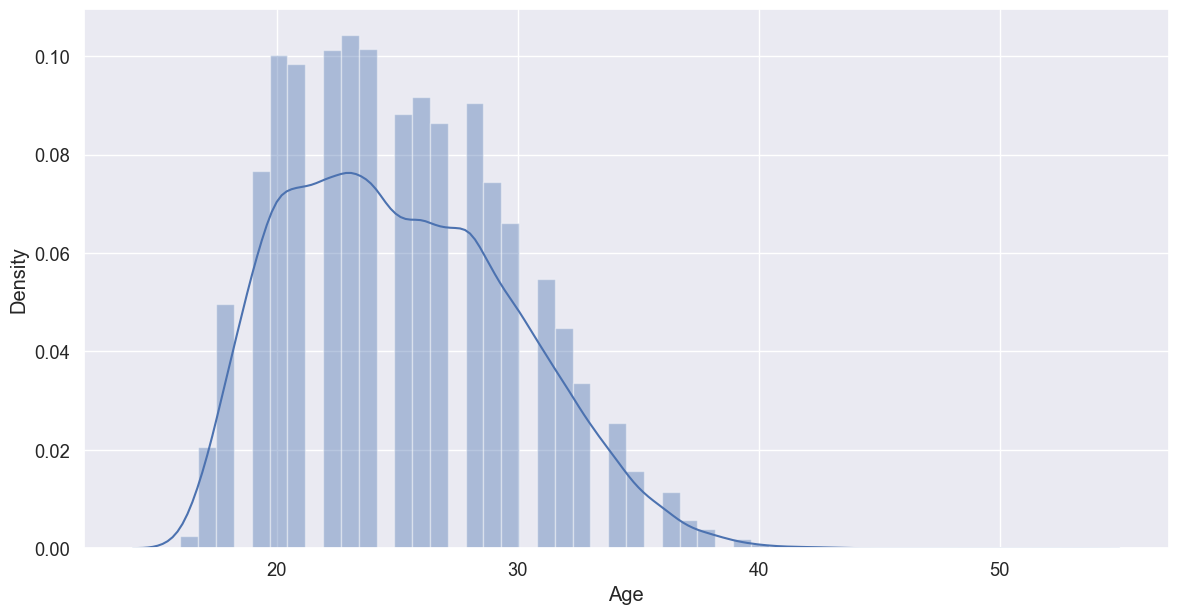

In [40]:
# Age distribution.
sns.distplot(df['Age']);

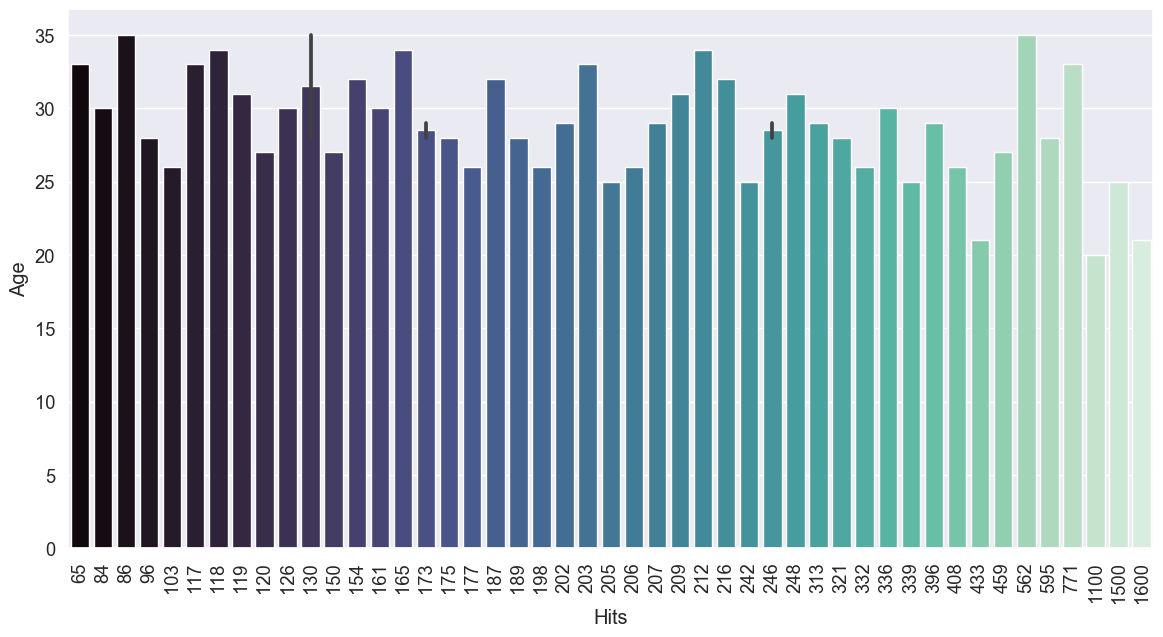

In [41]:
# Bar plot of first 50 individuals.
sns.barplot(data=df, x=df['Hits'][:50], y=df['Age'], palette="mako")
plt.xticks(rotation=90);

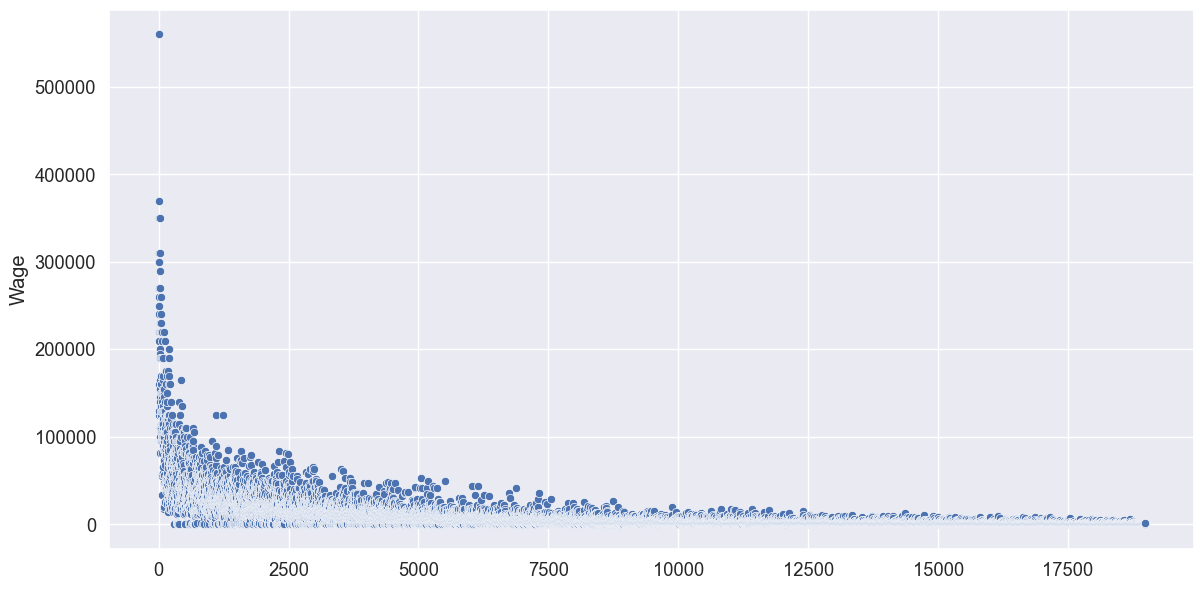

In [42]:
# Scatter plot of wages.
sns.scatterplot(df['Wage'], palette='mako');

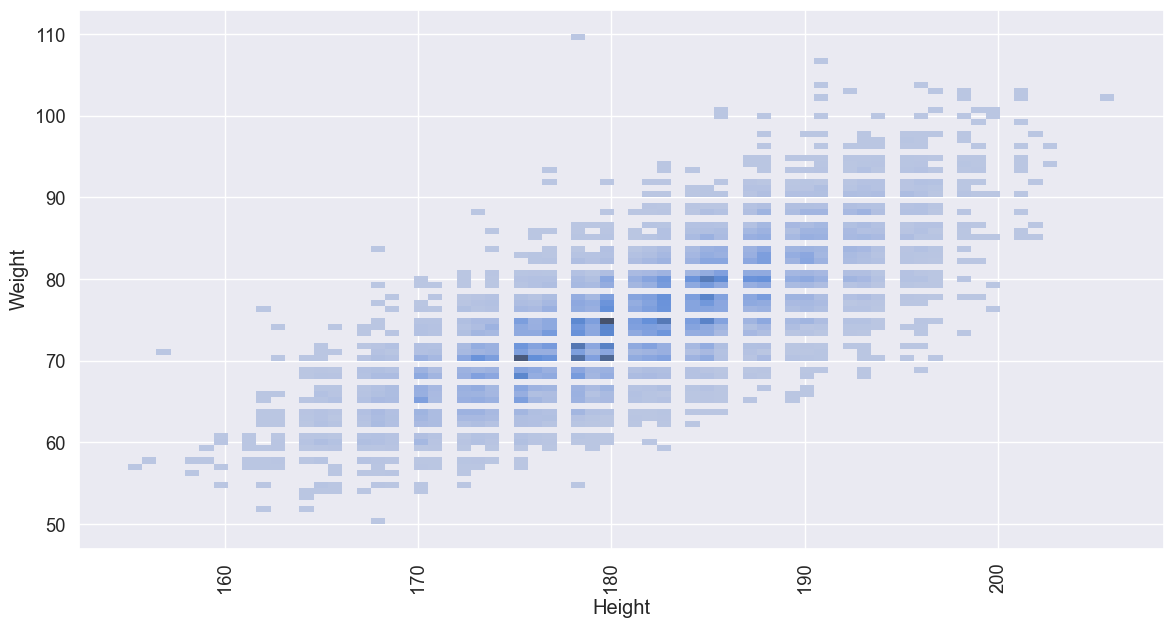

In [43]:
# Heatmap for weight and height.
sns.histplot(data=df, x=df['Height'], y=df['Weight'], palette='mako')
plt.xticks(rotation=90);

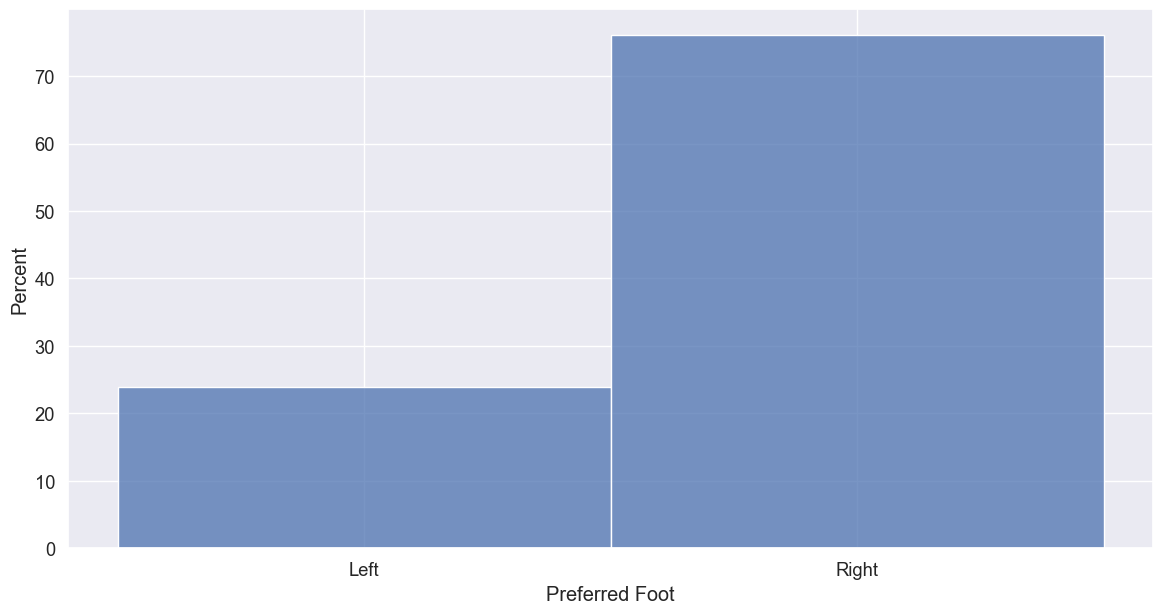

In [44]:
# View of most used foot.
sns.histplot(data=df, x=df['Preferred Foot'], stat="percent");

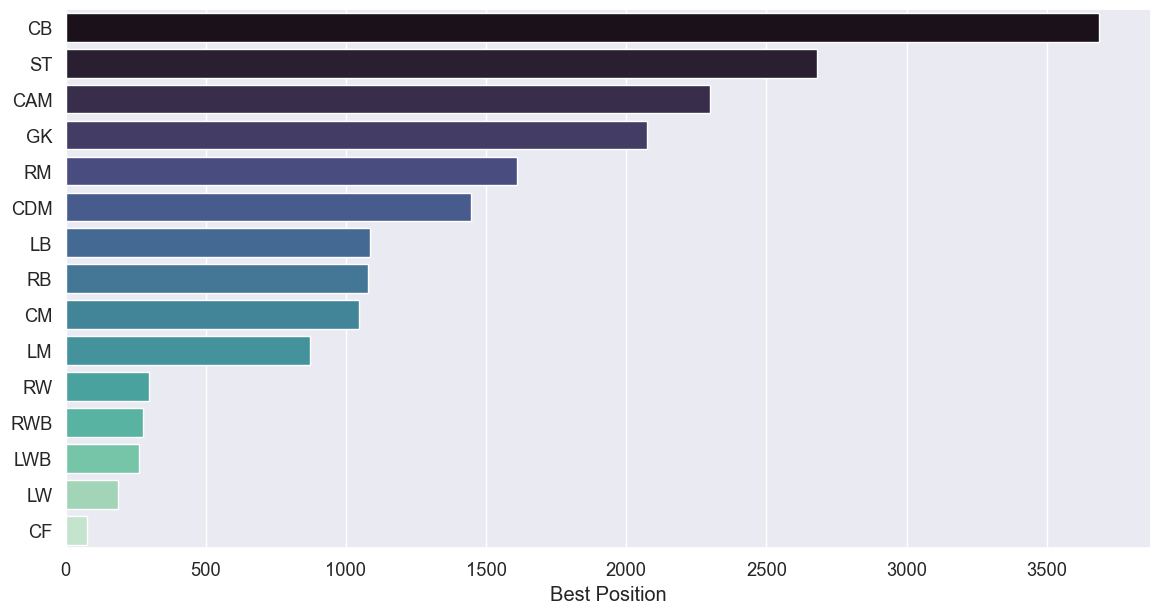

In [45]:
# View position count values.
position = df['Best Position'].value_counts()
sns.barplot(y=position.index, x=position, orient='h', palette='mako');

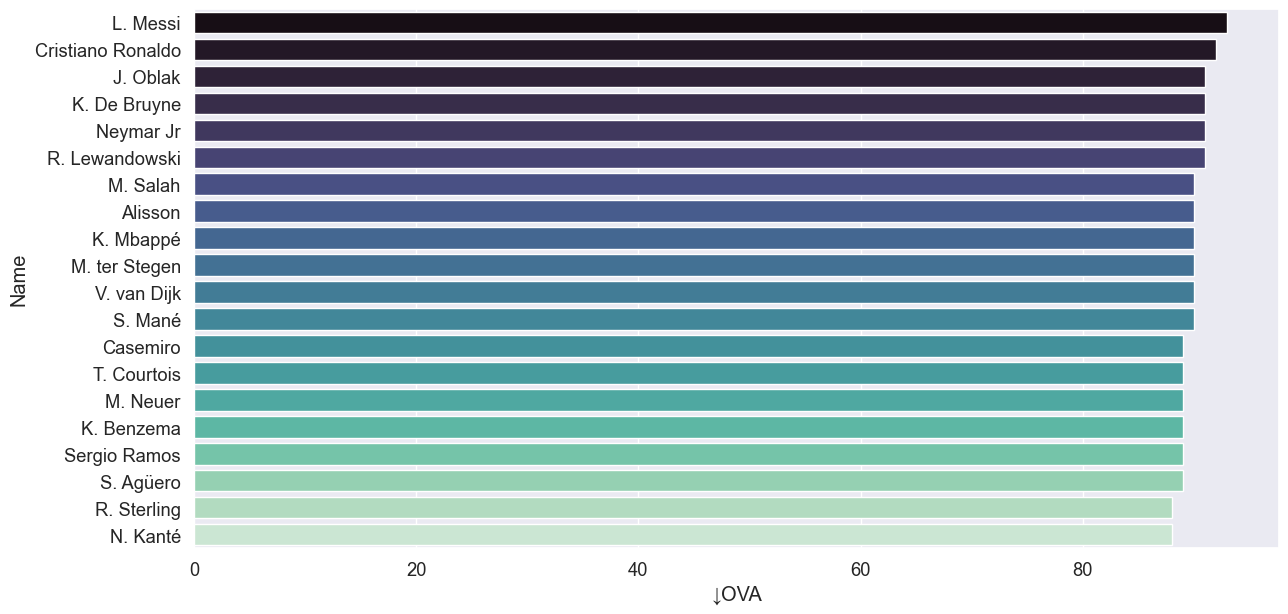

In [46]:
# Bar plot of first 20 best performing players.
sns.barplot(data=df, x=df['↓OVA'], y=df['Name'][:20], palette="mako");

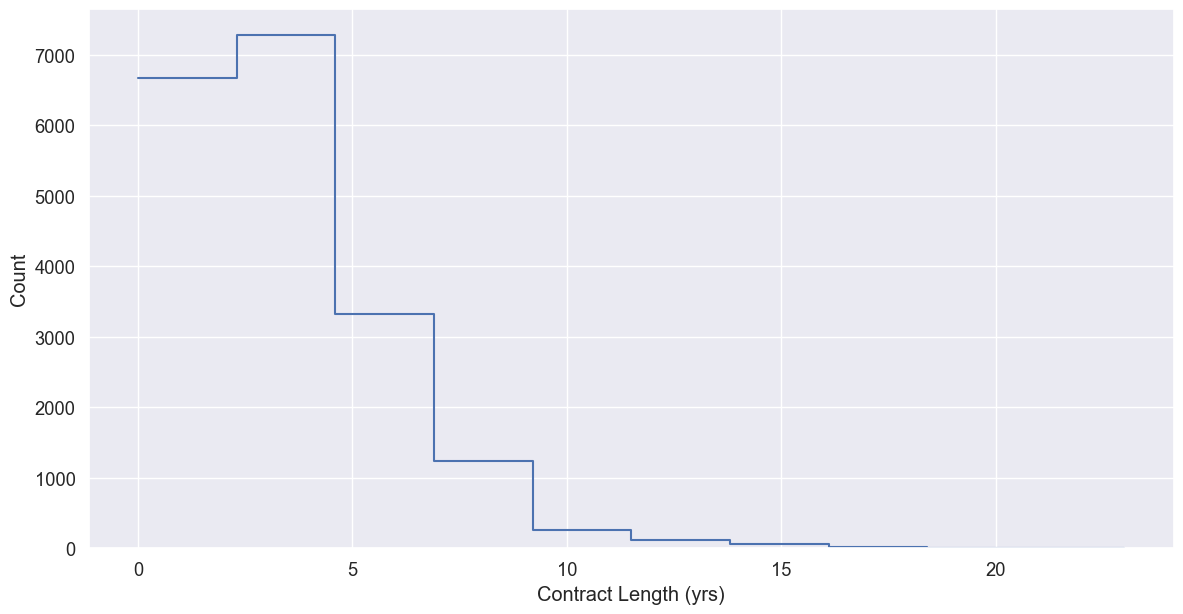

In [47]:
# View number of years served at a club.
sns.histplot(x=df['Contract Length (yrs)'], bins=10, stat='count', element='step', fill=False);

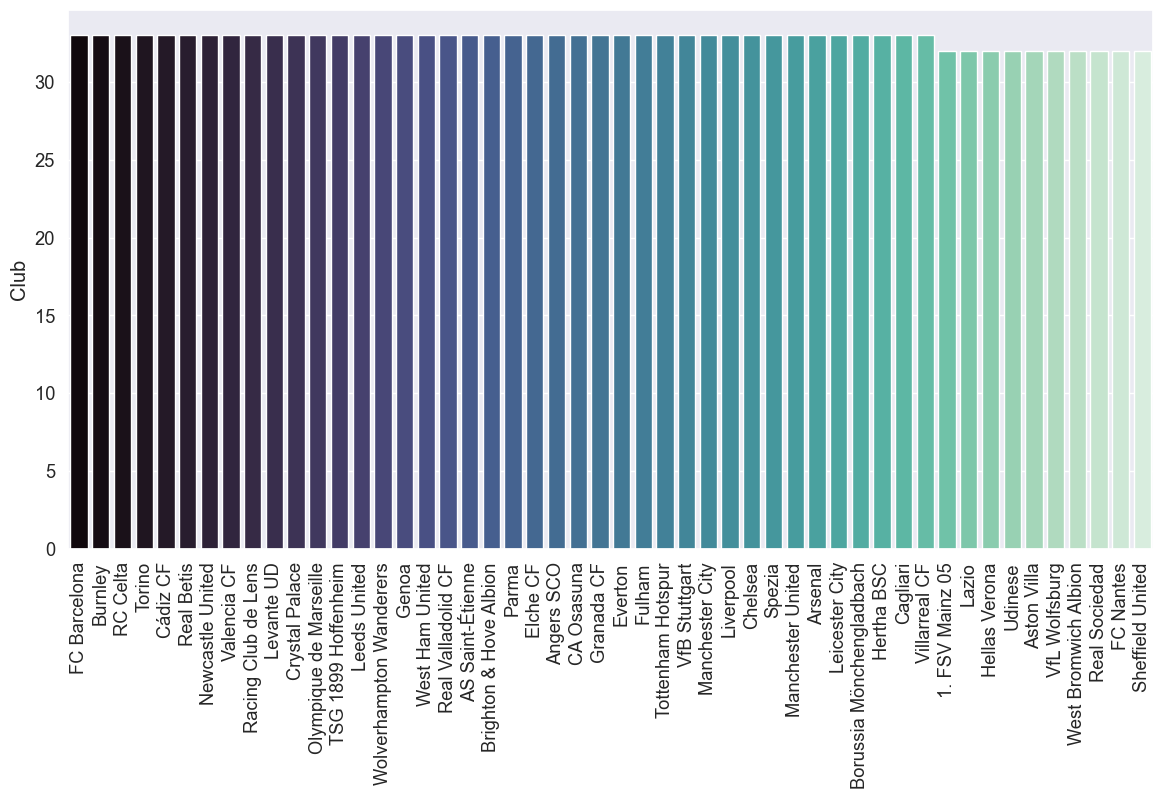

In [48]:
# View number of players by club.
clubs = df['Club'].value_counts()[1:51]
sns.barplot(x=clubs.index, y=clubs, palette='mako')
plt.xticks(rotation=90);

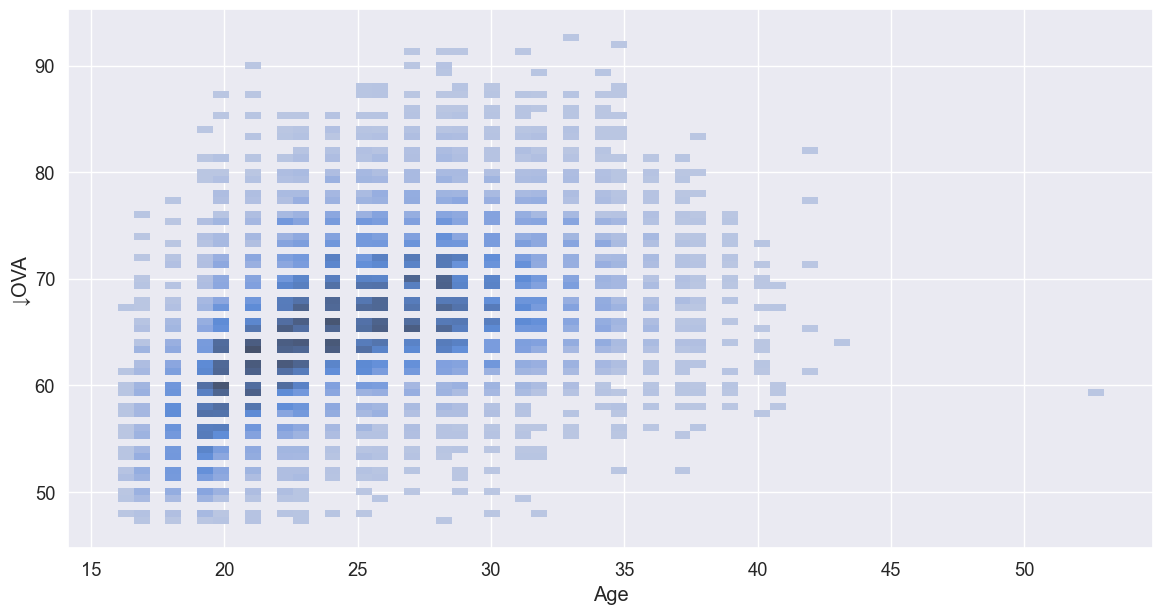

In [49]:
# Heatmap of perfomance by age.
sns.histplot(x=df['Age'], y=df['↓OVA'], palette='mako');

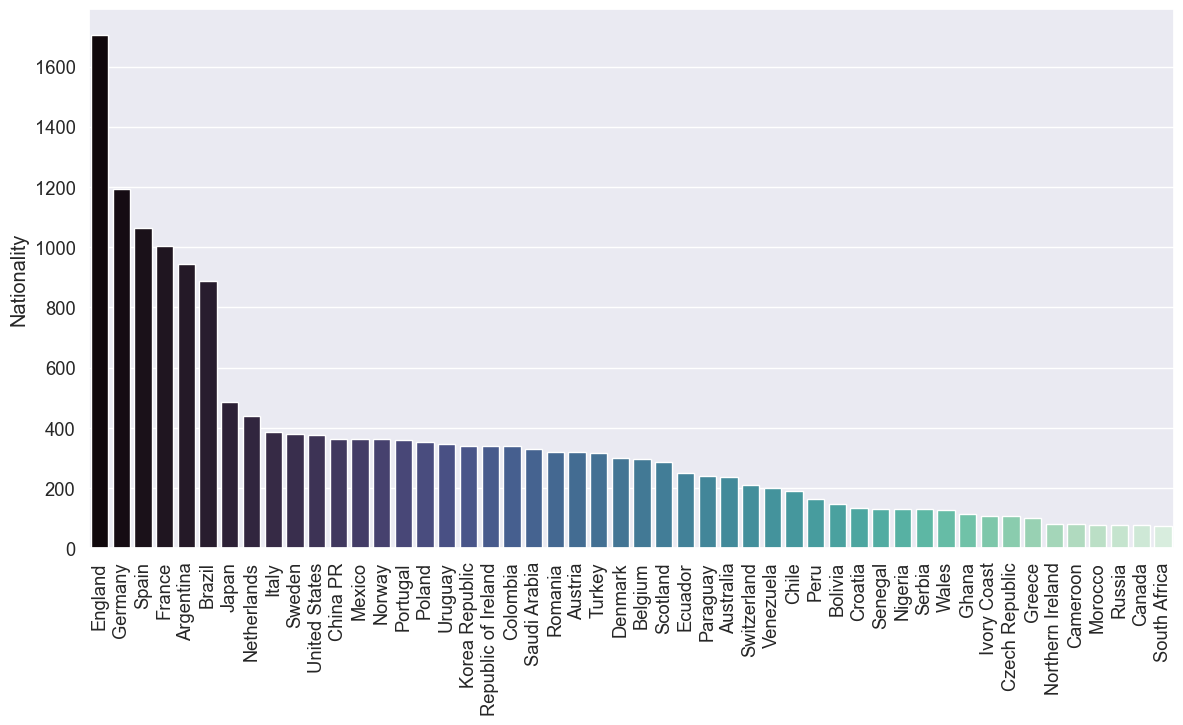

In [50]:
# Arrange column by number of players. Take first 50 nations.
nations = df['Nationality'].value_counts()[:50]

# View number of players by nationality.
sns.barplot(x=nations.index, y=nations, palette='mako')
plt.xticks(rotation=90);

In [51]:
# Export cleaned dataframe to a csv file.
df.to_csv('fifa21_cleaned.csv', index=False)